In [37]:
library(tidyverse)

In [45]:
`%+replace%` <- ggplot2::`%+replace%`

theme_zietzm <- function(base_size = 11.5, base_family = "") {
    # Starts with theme_bw and then modify some parts
    # Theme options are documentated at http://docs.ggplot2.org/current/theme.html
    ggplot2::theme_classic(base_size = base_size, base_family = base_family) %+replace%
    ggplot2::theme(

        strip.background  = ggplot2::element_rect(fill = NA, colour = 'grey90', size = 0),
        strip.text = element_text(vjust = 1, size = 10),
        plot.margin       = ggplot2::margin(t=2, r=2, b=2, l=2, unit='pt'),
        legend.spacing     = grid::unit(0.1, 'cm'),
        legend.key        = ggplot2::element_blank(),
        panel.border=element_rect(fill = NA, color = 'black', size = 0.5), 
        axis.line=element_line(size=0),
    )
}

In [54]:
head(df, 2)

feature,feature_information,feature_group,data_source,task,AUROC
inf,feature,Inference score,TFTG,Systematic,0.5188397
edge_prior,no edge info,Edge prior,BioRxiv,Reconstruction,0.7257429


In [60]:
df <- read_csv('auroc.csv') %>%
    mutate(
        AUROC = pmax(AUROC, 1 - AUROC),
        feature_group = feature_group %>% recode_factor(jaccard = 'Jaccard', rwr = 'RWR', 
                                      inf = 'Inference score', prior = 'Edge prior'),
        task = task %>% recode_factor(reconstruction = 'Reconstruction', systematic = 'Systematic'),
        feature_information = feature_information %>% recode_factor('feature' = 'feature', 
                                                                    'corrected feature' = 'corrected feature', 
                                                                    'no edge info' = 'permutation-based')
    )

head(df)

Parsed with column specification:
cols(
  feature = col_character(),
  feature_information = col_character(),
  feature_group = col_character(),
  data_source = col_character(),
  task = col_character(),
  AUROC = col_double()
)


feature,feature_information,feature_group,data_source,task,AUROC
inf,feature,Inference score,TFTG,Systematic,0.5188397
edge_prior,permutation-based,Edge prior,BioRxiv,Reconstruction,0.7257429
edge_prior,permutation-based,Edge prior,BioRxiv,Systematic,0.5692972
edge_prior,permutation-based,Edge prior,PPI,Reconstruction,0.7777778
edge_prior,permutation-based,Edge prior,PPI,Systematic,0.5422495
edge_prior,permutation-based,Edge prior,TFTG,Reconstruction,0.8234251


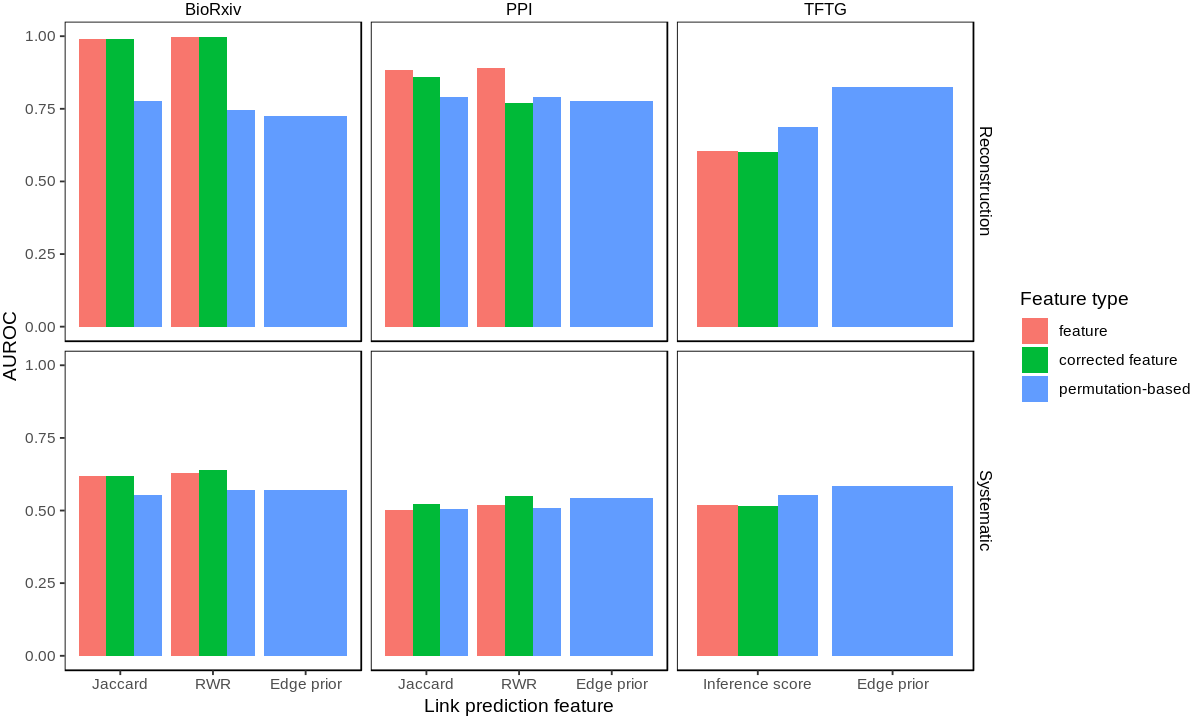

In [61]:
options(repr.plot.width=10, repr.plot.height=6)

g <- (
    ggplot(df, aes(x = feature_group, y = AUROC, fill = feature_information))
    + geom_col(position = 'dodge')
    + facet_grid(rows = vars(task), cols = vars(data_source), scales = 'free')
    + ylim(0, 1)
    + xlab('Link prediction feature')
    + scale_fill_discrete(name = 'Feature type')
    + theme_zietzm()
)

ggsave(filename = '../../img//4_ROC/area_bars.png', plot = g, dpi = 500, width = 10, height = 6)

g